In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd "drive/My Drive/MNIST"

/content/drive/My Drive/MNIST


In [ ]:
!ls

'Copy of Copy of MNIST Keras CNN.ipynb'   predictions.ipynb   submit_off1.csv
'Copy of MNIST Keras CNN.ipynb'		  submission.csv      submit_off.csv
'MNIST (1).ipynb'			  submit1.csv	      test.csv
 MNIST.ipynb				  submit2.csv	      train.csv
 MNIST_Keras_CNN.ipynb			  submit5.csv
'Not MNIST Keras CNN.ipynb'		  submit.csv


In [ ]:
import pandas as pd
import numpy as np

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df_train["label"]
df_train.drop(["label"], axis=1, inplace=True)

In [ ]:
df_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train = df_train.values.reshape(-1, 28, 28, 1)
df_train.shape

(42000, 28, 28, 1)

In [ ]:
df_train = df_train/255.0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_train, y, test_size=0.25, random_state=42)

In [ ]:
from tensorflow import keras   

m = keras.Sequential()
m.add(keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
m.add(keras.layers.BatchNormalization())

m.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding='same', kernel_initializer='he_uniform'))
m.add(keras.layers.BatchNormalization())
m.add(keras.layers.MaxPool2D(2, 2))
m.add(keras.layers.Dropout(0.20))

m.add(keras.layers.Conv2D(64, (3, 3), activation="relu", padding='same', kernel_initializer='he_uniform'))
m.add(keras.layers.BatchNormalization())

m.add(keras.layers.Conv2D(64, (3, 3), activation="relu", padding='same', kernel_initializer='he_uniform'))
m.add(keras.layers.BatchNormalization())
m.add(keras.layers.MaxPool2D(2, 2))
m.add(keras.layers.Dropout(0.2))

m.add(keras.layers.Conv2D(128, (3, 3), activation="relu", padding='same', kernel_initializer='he_uniform'))
m.add(keras.layers.BatchNormalization())

m.add(keras.layers.Conv2D(128, (3, 3), activation="relu", padding='same', kernel_initializer='he_uniform'))
m.add(keras.layers.BatchNormalization())
m.add(keras.layers.MaxPool2D(2, 2))
m.add(keras.layers.Dropout(0.2))

m.add(keras.layers.Flatten())
m.add(keras.layers.Dropout(0.2))
m.add(keras.layers.Dense(128, activation="relu"))
m.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
m.compile(optimizer=keras.optimizers.RMSprop(), loss="sparse_categorical_crossentropy", metrics=["acc"])

In [ ]:
lr_reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.1, 
                                            min_lr=0.003)

In [ ]:
history = m.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=20, validation_batch_size=20, callbacks=[lr_reduce])

Epoch 1/30
1575/1575 [==============================] - 9s 6ms/step - loss: 0.2358 - acc: 0.9369 - val_loss: 0.1113 - val_acc: 0.9736
Epoch 2/30
1575/1575 [==============================] - 9s 6ms/step - loss: 0.1009 - acc: 0.9771 - val_loss: 0.0654 - val_acc: 0.9882
Epoch 3/30
1575/1575 [==============================] - 9s 6ms/step - loss: 0.0806 - acc: 0.9822 - val_loss: 0.0764 - val_acc: 0.9837
Epoch 4/30
1575/1575 [==============================] - 9s 6ms/step - loss: 0.0676 - acc: 0.9857 - val_loss: 0.0467 - val_acc: 0.9902
Epoch 5/30
1575/1575 [==============================] - 9s 6ms/step - loss: 0.0596 - acc: 0.9881 - val_loss: 0.0592 - val_acc: 0.9893
Epoch 6/30
1575/1575 [==============================] - 9s 6ms/step - loss: 0.0521 - acc: 0.9895 - val_loss: 0.0542 - val_acc: 0.9919
Epoch 7/30
1575/1575 [==============================] - 9s 6ms/step - loss: 0.0522 - acc: 0.9898 - val_loss: 0.0485 - val_acc: 0.9919
Epoch 8/30
1575/1575 [==============================] - 9s 6ms

In [ ]:
df_test = df_test.values.reshape(-1,28,28,1)
df_test = df_test/255.0
pred = np.argmax(m.predict(df_test), axis = 1)

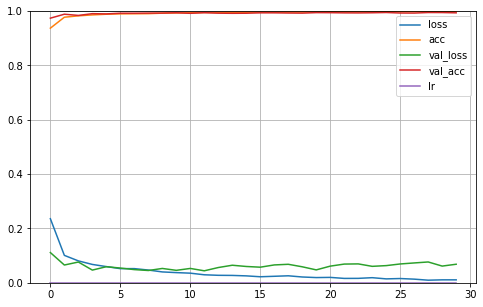

In [20]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
ans = pd.DataFrame({"ImageId" : range(1, 28001), "Label":pred})

In [ ]:
ans.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [ ]:
ans.to_csv("official_submission.csv", index=False)

Image label is:|  0


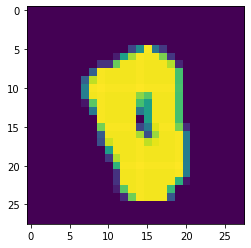

In [ ]:
from matplotlib import pyplot as plt
cnt = 6682
print("Image label is:| ", pred[cnt])
plt.imshow(df_test[cnt][:,:,0])